### Importing & Feature Engineering

##### Import Dataset

Handling imbalanced dataset using Oversampling

Creating new features from existing features 
e.g. word_count, contains_currency_symbol, contains_numbers, etc.


### Data Cleaning (NLTK)

- Removing special character and numbers using regular expression

- Converting the entire SMS into lower case

- Tokenizing the SMS by words

- Removing the stop words

- Lemmatizing the words

- Joining the lemmatized words

- Building a corpus of messages




### Machine Learning Model

Model Building and Evaluation

- Multinomial Naive Bayes

- Decision Tree

### Model Prediction

### Model Deployment

<img src = "classificatin.png"/>

In [1]:
# importing required lib's

import pandas as pd
import numpy as np

In [2]:
# importing data_set

dataset = pd.read_csv("SpamCollection.csv",sep="\t",names=["label","Message"])

In [3]:
dataset

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.isnull().sum()

label      0
Message    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.describe()

,label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# converting labels into int  (0,1)

dataset['label'] = dataset["label"].map({'ham' : 0,
                                        'spam' : 1})

In [8]:
dataset

,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
dataset['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [10]:
# importing libs for visualization

import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

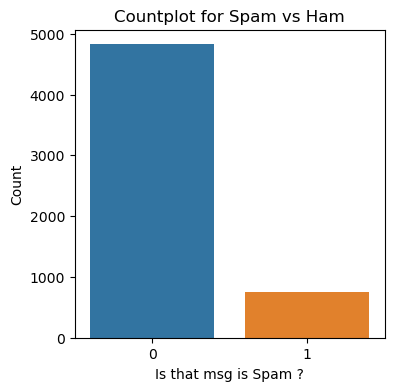

In [11]:
# countplot for Spam Vs Ham 
plt.figure(figsize=(4,4))
sns.countplot(x="label" , data = dataset)
plt.title("Countplot for Spam vs Ham")
plt.xlabel("Is that msg is Spam ?")
plt.ylabel("Count")
plt.show()

In [12]:
only_spam = dataset[dataset["label"] == 1]

In [13]:
only_spam

,label,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
print("Number of Spam messages : ", len(only_spam))
print("Number of Ham Message : ",len(dataset) - len(only_spam))

Number of Spam messages :  747
Number of Ham Message :  4825


In [15]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [16]:
count

6

In [17]:
 for i in range(0,count-1):
        dataset = pd.concat([dataset,only_spam])
    
dataset.shape

(9307, 2)

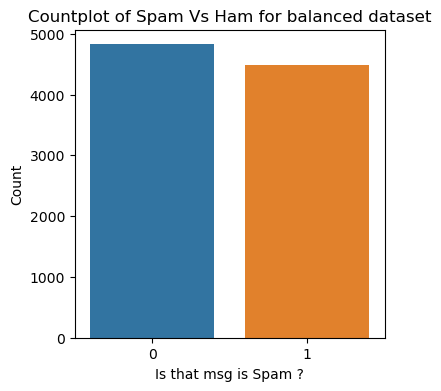

In [18]:
# countplot of Spam Vs Ham for balanced dataset
plt.figure(figsize=(4,4))
sns.countplot(x="label" , data = dataset)
plt.title("Countplot of Spam Vs Ham for balanced dataset")
plt.xlabel("Is that msg is Spam ?")
plt.ylabel("Count")
plt.show()

In [19]:
# Creating new feauture Word_Count
dataset["Word_Count"] = dataset["Message"].apply(lambda x : len(x.split()))

In [20]:
dataset

,label,Message,Word_Count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


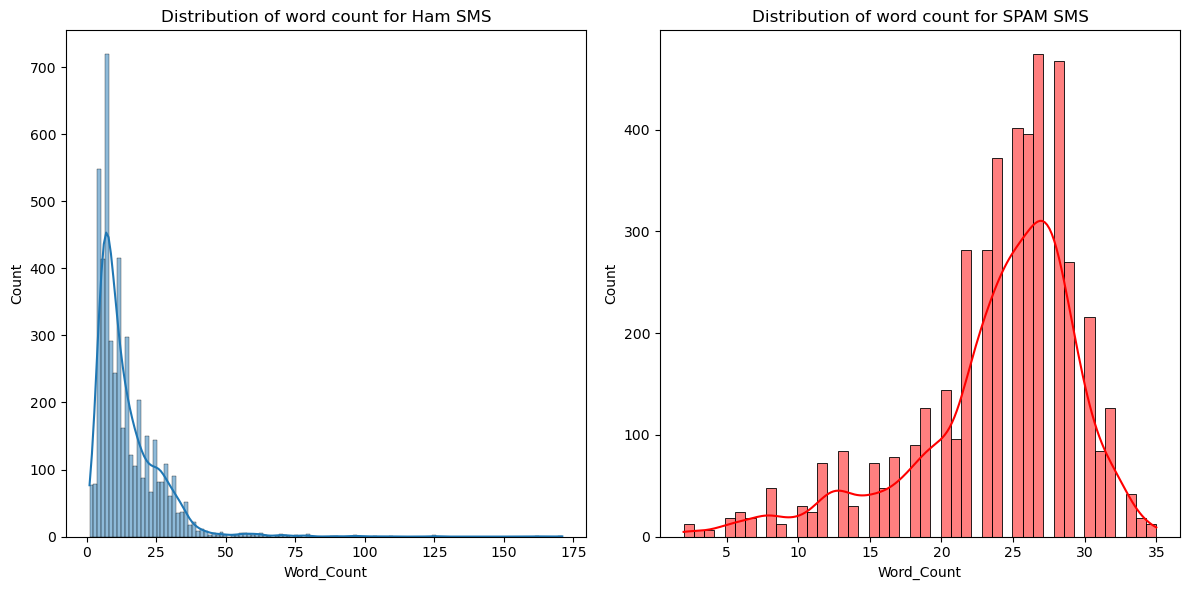

In [21]:
plt.figure(figsize=(12,6))

# (1,1)

plt.subplot(1,2,1)

sns.histplot(dataset [dataset["label"] == 0].Word_Count,kde=True) 
plt.title('Distribution of word count for Ham SMS')

# (1,2)

plt.subplot (1,2,2)
sns.histplot(dataset [dataset["label"] ==  1].Word_Count, color="red", kde=True)
plt.title('Distribution of word count for SPAM SMS')

plt.tight_layout()
plt.show()

In [22]:
# Creating a new feature for containing currency symbol

def currency(data):
    currency_symbol = ['$','€','£','γ','₹']
    for i in currency_symbol:
        if i in data:
            return 1
    return 0

In [23]:
dataset['Containing_currency_Symbols'] = dataset["Message"].apply(currency)

In [24]:
dataset

,label,Message,Word_Count,Containing_currency_Symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


In [25]:
dataset['Containing_currency_Symbols'].value_counts()

0    7746
1    1561
Name: Containing_currency_Symbols, dtype: int64

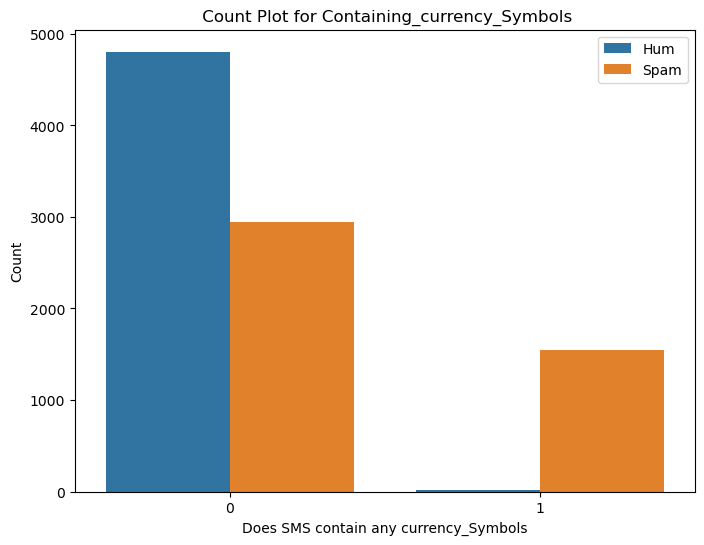

In [26]:
# creating the Count plot for Containing_currency_Symbols

plt.figure(figsize=(8,6))
sns.countplot(x= "Containing_currency_Symbols",data = dataset,hue='label')
plt.title(" Count Plot for Containing_currency_Symbols")
plt.xlabel("Does SMS contain any currency_Symbols")
plt.ylabel("Count")
plt.legend(labels = ['Hum',"Spam"], loc = 1)

In [27]:
# creating the new feature of Creating numbers

def create_numbers(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [28]:
dataset['Creating_Numbers'] = dataset['Message'].apply(create_numbers)

In [29]:
dataset

,label,Message,Word_Count,Containing_currency_Symbols,Creating_Numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


In [30]:
dataset['Creating_Numbers'].value_counts()

1    5003
0    4304
Name: Creating_Numbers, dtype: int64

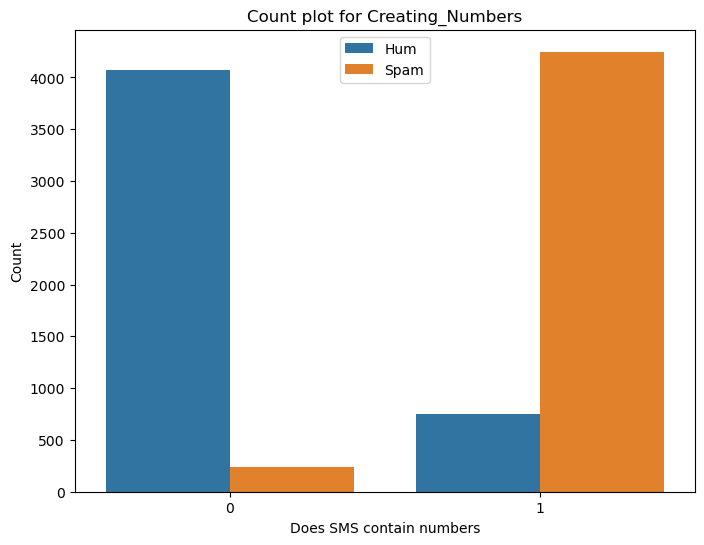

In [31]:
# Count plot for Creating_Numbers

plt.figure(figsize=(8,6))
sns.countplot(x='Creating_Numbers' ,data = dataset,hue='label')
plt.title("Count plot for Creating_Numbers")
plt.xlabel("Does SMS contain numbers")
plt.ylabel("Count")
plt.legend(labels = ['Hum',"Spam"], loc = 9)

In [32]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Cleaning

<img src ="datacleaning.png"/>

In [33]:
# Data Cleaning

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.Message):
    message          =   re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)# filtering out the special charecter and symbol
    message          =   message.lower()
    words            =   message.split()
    filtered_words   =   [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words       =   [wnl.lemmatize(word) for word in filtered_words]
    message          =   ' '.join(lemm_words)
    
    corpus.append(message)

In [35]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [36]:
# creating a bag of words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

C:\Users\abc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
x = pd.DataFrame(vectors,columns=feature_names)
y = dataset['label']

In [38]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.343368,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
x_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [42]:
# naive bayes 

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(cv)
print(cv.std)

[0.93986637 0.94314381 0.94369369 0.94983278 0.9452514  0.93854749
 0.93406593 0.94394619 0.9415656  0.94606742]
<built-in method std of numpy.ndarray object at 0x0000028DC9406DB0>


In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [44]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [46]:
cn = confusion_matrix(y_test,y_pred)

In [47]:
cn

array([[905,  54],
       [ 56, 847]], dtype=int64)

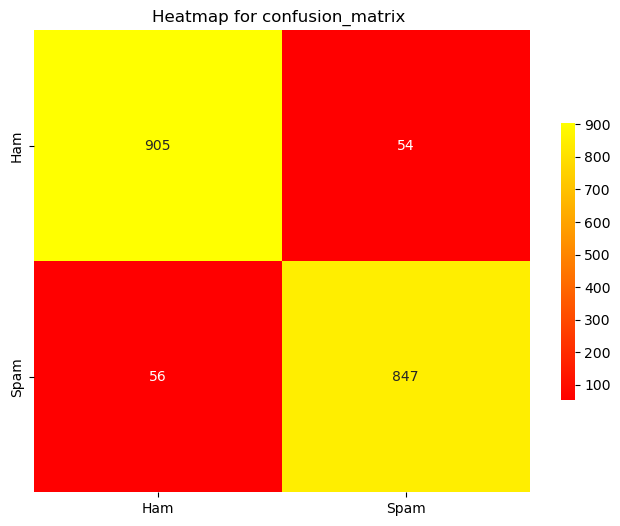

In [48]:
plt.figure(figsize=(8,6))
axis_labels = ['Ham','Spam']
sns.heatmap(data = cn,xticklabels=axis_labels,yticklabels=axis_labels,cmap='autumn',annot=True,fmt='g',cbar_kws={'shrink' : 0.6})
plt.title("Heatmap for confusion_matrix ")
plt.xlabel=("Actual Values")
plt.ylabel=("Predicted Values")

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.003


In [50]:
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       959
           1       0.96      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [52]:
cn1 = confusion_matrix(y_test,y_pred1)
cn1

array([[924,  35],
       [  4, 899]], dtype=int64)

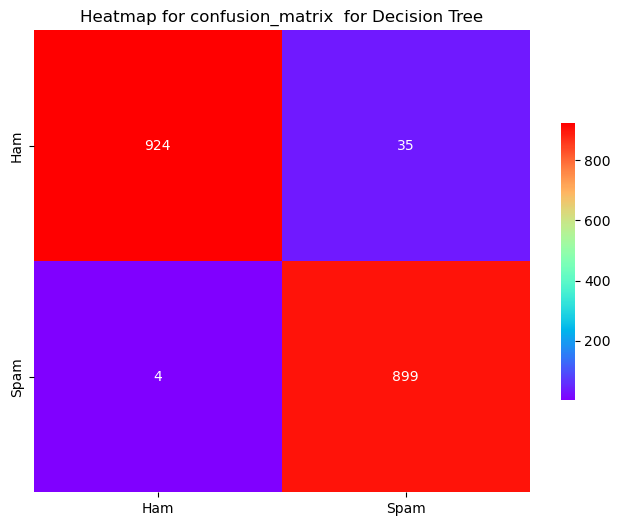

In [53]:
plt.figure(figsize=(8,6))
axis_labels = ['Ham','Spam']
sns.heatmap(data = cn1,xticklabels=axis_labels,yticklabels=axis_labels,cmap='rainbow',annot=True,fmt='g',cbar_kws={'shrink' : 0.6})
plt.title("Heatmap for confusion_matrix  for Decision Tree")
plt.xlabel=("Actual Values")
plt.ylabel=("Predicted Values")

In [54]:
def predict_spam(sms):
    message          =   re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)# filtering out the special charecter and symbol
    message          =   message.lower()
    words            =   message.split()
    filtered_words   =   [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words       =   [wnl.lemmatize(word) for word in filtered_words]
    message          =   ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [55]:
sample_message =  'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

This is a Ham (normal) message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


<img src="nospam.jpg" style = "width=800 px"/>

In [68]:
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [56]:
sample_message =  'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


<img src="spam.png" style = "width=800 px"/>

In [57]:
sample_message =  'I use PayTree sent you up to € 25 Sign up with my link to claim, then get €300, 000 give away fund: https://palmpay.site/QXAfLgKsPhKA'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [58]:
sample_message =  ' Follow this link to join my WhatsApp group: http://unnoficcial_whatsapp.com/download'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [59]:
sample_message =  ' Hello Call me when u are free ; may be at 4 pm '

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [60]:
sample_message =  ' Hello Call me when u are free ;  '

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [64]:
sample_message =  'very fun'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

This is a Ham (normal) message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [65]:
sample_message =  'pls reply 2 this text with your valid name'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [66]:
sample_message =  'for your inclusive text credits'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

Got it ! This is a spam message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [67]:
sample_message =  'bad book do not buy'

if predict_spam(sample_message): 
    print('Got it ! This is a spam message.')

else:
    print('This is a Ham (normal) message.')

This is a Ham (normal) message.


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
